<a href="https://colab.research.google.com/github/carneiro-fernando/EBAC/blob/main/Projetos/Projeto_de_Parceria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://th.bing.com/th/id/OIG.yn9WO8z8q0Kl9LIkqAfe?pid=ImgGn" align="center" alt="Semantix-logo" width="150">
            
# Regressão Linear para predições no Mercado Financeiro
*by [Fernando Carneiro](https://www.linkedin.com/in/fernandohcarneiro/)*

---

## Sumário
1.   [**Introdução**](#intro)
1.   [**Análise de Dados**](#da)
1.   [**Aprendizado de Máquina**](#ml)
1.   [**Resultados**](#results)
1.   [**Conclusão**](#conclusion)

---
<a id='intro'></a>
## 1. Introdução

### 1.1 Objetivo
O objetivo deste projeto é realizar uma análise de dados exploratória e demonstrar a eficácia da Regressão Linear, uma técnica básica de aprendizado de máquina, na previsão do valor de ações.

### 1.2 Descrição dos dados
Utilizei neste projeto dados obtidos do site [Yahoo Finance](https://finance.yahoo.com) através da API **yFinance**, disponível [aqui](https://pypi.org/project/yfinance/), ela permite a coleta de forma fácil aos dados financeiros do site e por ser uma biblioteca de código aberto, é amplamente usada na comunidade de análise financeira como ferramenta confiável. A análise se concentra em empresas selecionadas do setor de saúde que estão listadas na bolsa de valores, ela inclui empresas que oferecem planos de saúde e redes de hospitais. Abaixo segue uma tabela com as empresas que serão analisadas durante este projeto. Na tabela o termo "*ticker*" refere-se a um código alfanumérico que identifica uma ação.

| Empresa | Ticker | Ramo | Website |
| --- | --- |--- | --- |
| Kora Saúde Participações S.A. | KRSA3 | Rede de hospitais | [Link](https://www.korasaude.com.br) |
| Hospital Mater Dei SA | MATD3 | Rede de hospitais | [Link](https://www.materdei.com.br) |
| Oncoclinicas do Brasil Servicos Medicos SA | ONCO3 | Rede de hospitais | [Link](https://www.grupooncoclinicas.com) |
| Rede D'Or São Luiz S.A. | RDOR3 | Rede de hospitais | [Link](https://ri.redeor.com.br) |
| Hapvida Participações e Investimentos S.A. | HAPV3 | Planos de saúde | [Link](https://www.hapvida.com.br) |
| Odontoprev S.A. | ODPV3 | Planos de saúde | [Link](https://www.odontoprev.com.br) |
| Qualicorp S.A. | QUAL3 | Planos de saúde | [Link](https://www.qualicorp.com.br) |
| Diagnósticos da América S.A. | DASA3 | Planos de saúde e rede de hospitais | [Link](https://www.dasa3.com.br) |

### 1.3 Estrutura dos dados (*schema*)
Os dados que trabalharemos tem a seguinte estrutura:

| Termo | Descrição | Tipo de dado |
| --- | --- | --- |
|'Date' | A data do registro de preço | DateTimeIndex
| 'Open' | O preço de abertura da ação no período | numpy.float64 |
| 'High' | O preço mais alto alcançado pela ação no período | numpy.float64 |
| 'Low' | O preço mais baixo alcançado pela ação no período | numpy.float64 |
| 'Close' | O preço de fechamento da ação no período | numpy.float64 |
| 'Volume' | O volume de negociação da ação no período | numpy.float64 |

### 1.4 Bibliotecas
Uma breve descrição das bibliotecas que foram usadas no projeto:

- **Pandas**: Uma biblioteca de manipulação e análise de dados que fornece estruturas de dados flexíveis e permite trabalhar com dados estruturados ou tabulares de maneira fácil e intuitiva.

- **NumPy**: Uma biblioteca para a linguagem Python, com suporte a arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas.

- **Matplotlib**: Uma biblioteca para criação de gráficos e visualizações de dados em geral, mais usada para gráficos 2D de arrays.

- **Seaborn**: Baseado em Matplotlib, o Seaborn ajuda na criação de gráficos mais atraentes e informativos. Ele é especialmente útil para visualização de dados estatísticos.

- **Scikit-learn**: Uma das bibliotecas mais populares para aprendizado de máquina em Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento, incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN.

- **yFinance**: Uma biblioteca Python que permite baixar dados históricos do mercado de ações do Yahoo Finance.

In [1]:
# Importações da bibliotecas
from datetime import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

---
<a id='da'></a>
## 2. Análise de Dados

### 2.1 Coleta de dados

#### A seguir as empresas do ramo de saúde listadas na B3

In [2]:
# Ignora warnings
warnings.filterwarnings('ignore')

# Este breve trecho de código nos ajuda a visualizar melhor os dados no notebook por filtrar avisos desnecessários.

In [3]:
# Listando os ativos de saúde
nomes_dos_tickers = ["KRSA3.SA", "MATD3.SA", "ONCO3.SA", "RDOR3.SA", "HAPV3.SA", "ODPV3.SA", "QUAL3.SA", "DASA3.SA"]

# Criando DataFrames com os dados históricos para todos os ativos
ticks_df = yf.download(nomes_dos_tickers, period='max', rounding=True, auto_adjust=True)

# Verificando o DataFrame
ticks_df.tail(5)

# A documentação do método .download() pode ser encontrada no link a seguir: (https://github.com/ranaroussi/yfinance/wiki/tickers#download)

[*********************100%%**********************]  8 of 8 completed


Close                                                        \
           DASA3.SA HAPV3.SA KRSA3.SA MATD3.SA ODPV3.SA ONCO3.SA QUAL3.SA   
Date                                                                        
2023-11-16    10.40     4.71     0.97     7.90    11.78     9.71     3.10   
2023-11-17    10.15     4.58     0.98     7.50    11.41     9.67     3.07   
2023-11-20    10.29     4.64     0.98     7.61    11.50     9.99     3.06   
2023-11-21     9.64     4.65     0.98     7.57    11.36     9.80     2.94   
2023-11-22     9.55     4.56     1.04     7.47    10.94     9.66     2.84   

                        High           ...     Open            Volume  \
           RDOR3.SA DASA3.SA HAPV3.SA  ... QUAL3.SA RDOR3.SA DASA3.SA   
Date                                   ...                              
2023-11-16    25.89    10.68     4.75  ...     3.17    25.50   449300   
2023-11-17    25.21    10.54     4.75  ...     3.15    25.95   328400   
2023-11-20    25.99    10.31     4.68  ...     3.10    25.21   227600   
2023-11-21    25.62    10.29     4.66  ...     3.06    25.99   488200   
2023-11-22    25.86     9.97     4.84  ...     2.97    25.87   487400   

                                                                    \
               HAPV3.SA   KRSA3.SA  MATD3.SA   ODPV3.SA   ONCO3.SA   
Date                                                                 
2023-11-16   84165500.0  3523400.0  463800.0  1551400.0  3430200.0   
2023-11-17  105935300.0  1038700.0  398600.0  1424900.0  4184000.0   
2023-11-20   51808800.0   372500.0  313700.0   553300.0  3250900.0   
2023-11-21   52522200.0   469700.0  207300.0   945400.0  1515700.0   
2023-11-22  114011500.0   758400.0  285500.0  1017400.0  2274900.0   

                                   
              QUAL3.SA   RDOR3.SA  
Date                               
2023-11-16   9592000.0  5272200.0  
2023-11-17   6686500.0  4470400.0  
2023-11-20   5801600.0  4017100.0  
2023-11-21   6244700.0  3428900.0  
2023-11-22  10503700.0  3933200.0  

[5 rows x 40 columns]

### 2.2 Limpeza dos dados

A primeira etapa da limpeza de dados foi verificar quantos valores nulos havia em cada coluna do DataFrame ticks_df. Isso é útil para a limpeza de dados, pois os valores nulos podem precisar ser tratados antes da análise.

In [29]:
# Verifica o número de valores nulos em cada coluna do DataFrame
print(ticks_df.isna().sum())

Close   DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
High    DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
Low     DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
Open    DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
Volume  DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998


A análise das séries de dados dos tickers analisados revelou a presença de milhares de valores nulos, com exceção do ticker DASA3.SA. Essa diferença é explicada pelas diferentes datas de início de registro na bolsa de valores das empresas analisadas. A DASA, por exemplo, foi a primeira empresa a iniciar suas negociações na bolsa dentre as empresas analisadas. A próxima etapa da análise consiste em verificar as datas iniciais de registro na bolsa de valores de cada empresa.

In [5]:
# Criando um DataFrame com a data da primeira operação registrada no objeto inicializado da API yFinance
data_inicial_df = pd.DataFrame({'Data_inicial': [yf.Ticker(t).history_metadata['firstTradeDate'] for t in nomes_dos_tickers]}, index=nomes_dos_tickers)

# Convertendo o formato de data
data_inicial_df['Data_inicial'] = (pd.to_datetime(data_inicial_df['Data_inicial'], unit='s').dt.date)

# Verificando
data_inicial_df.sort_values(by='Data_inicial')

,Data_inicial
DASA3.SA,2004-11-19
ODPV3.SA,2006-12-01
QUAL3.SA,2011-06-29
HAPV3.SA,2018-04-26
RDOR3.SA,2020-12-15
MATD3.SA,2021-05-13
KRSA3.SA,2021-08-16
ONCO3.SA,2021-09-21


Com essa informação em mãos, cada ticker foi examinado em busca de valores nulos após a data de registro inicial. O resultado (abaixo) mostra que durante o período de registro os dados são integrais, sem necessidade de intervenção adicional.

In [30]:
# Verificando se há valores inválidos durante o período de registro de transações para cada ticker.
print('Valores nulos desde o início do registro:\n')

for ticker in data_inicial_df.index:
  data_inicial = data_inicial_df.loc[ticker, 'Data_inicial']

  # Selecionando dentro do índice 'Close' as datas entre o período inicial e o último registro.
  periodo_selecionado = ticks_df['Close'][ticker].loc[data_inicial : ]

  # Imprimindo a soma de valores nulos dentro do período selecionado.
  print(f"Nome: {ticker} | data inicial: {data_inicial} | valores nulos: {periodo_selecionado.isnull().sum()}")

Valores nulos desde o início do registro:

Nome: KRSA3.SA | data inicial: 2021-08-16 | valores nulos: 0
Nome: MATD3.SA | data inicial: 2021-05-13 | valores nulos: 0
Nome: ONCO3.SA | data inicial: 2021-09-21 | valores nulos: 0
Nome: RDOR3.SA | data inicial: 2020-12-15 | valores nulos: 0
Nome: HAPV3.SA | data inicial: 2018-04-26 | valores nulos: 0
Nome: ODPV3.SA | data inicial: 2006-12-01 | valores nulos: 0
Nome: QUAL3.SA | data inicial: 2011-06-29 | valores nulos: 0
Nome: DASA3.SA | data inicial: 2004-11-19 | valores nulos: 0


### Visualização dos dados

A análise dos dados numéricos do DataFrame, explora padrões, tendências e ajuda a identificar *outliers*. Para tal, o método describe() faz uma análise suficientemente completa.

In [31]:
# Análise dos dados numéricos. Como referencia foi usado o índice 'Close'.
ticks_df['Close'].describe()

,DASA3.SA,HAPV3.SA,KRSA3.SA,MATD3.SA,ODPV3.SA,ONCO3.SA,QUAL3.SA,RDOR3.SA
count,4728.000000,1383.000000,567.000000,632.000000,4209.000000,542.000000,3080.000000,730.000000
mean,20.211908,9.027292,2.761834,11.444383,8.074866,8.793930,15.593928,42.905822
std,20.842070,4.031770,1.986106,3.893999,3.902803,2.342055,7.303527,16.734179
min,4.660000,1.940000,0.740000,6.110000,1.080000,4.210000,2.800000,19.840000
25%,9.640000,5.425050,1.060000,8.300000,5.680000,6.787500,10.752500,28.970000
50%,12.865000,8.200000,2.550000,9.695000,7.970000,9.015000,13.757950,34.540000
75%,24.610000,12.408200,3.550000,15.230000,11.480000,10.617500,19.250650,62.235000
max,195.840000,18.151400,8.150000,21.220000,16.090000,15.410000,39.847300,73.300000


Verificamos que:


*   DASA3.SA - É a ação negociada a mais tempo com +4700 registros (count), confirmando os dados que temos sobre data inicial.
*   RDOR3.SA - Tem o maior valor médio, mais que o dobro da segunda ação com maior valor.
*   KRSA3.SA - Tem o menor média e desvio padrão em termos de valor financeiro, em contraste DASA3.SA tem a maior volatilidade com desvio padrão de ~R$20,00.
*   *Outliers* - A ação DASA3.SA tem uma diferença muito grande entre o terceiro quartil e o valor máximo, indicando possíveis '*outliers*'.


***************************************PAREI AQUI******************************************

Nesta seção, foi realizada a visualização exploratória dos dados históricos dos ativos através da plotagem de gráficos de séries temporais. Os gráficos de séries temporais são ferramentas poderosas para a análise de dados financeiros, pois ajudam a identificar tendências, padrões e anomalias nos preços dos ativos ao longo do tempo.

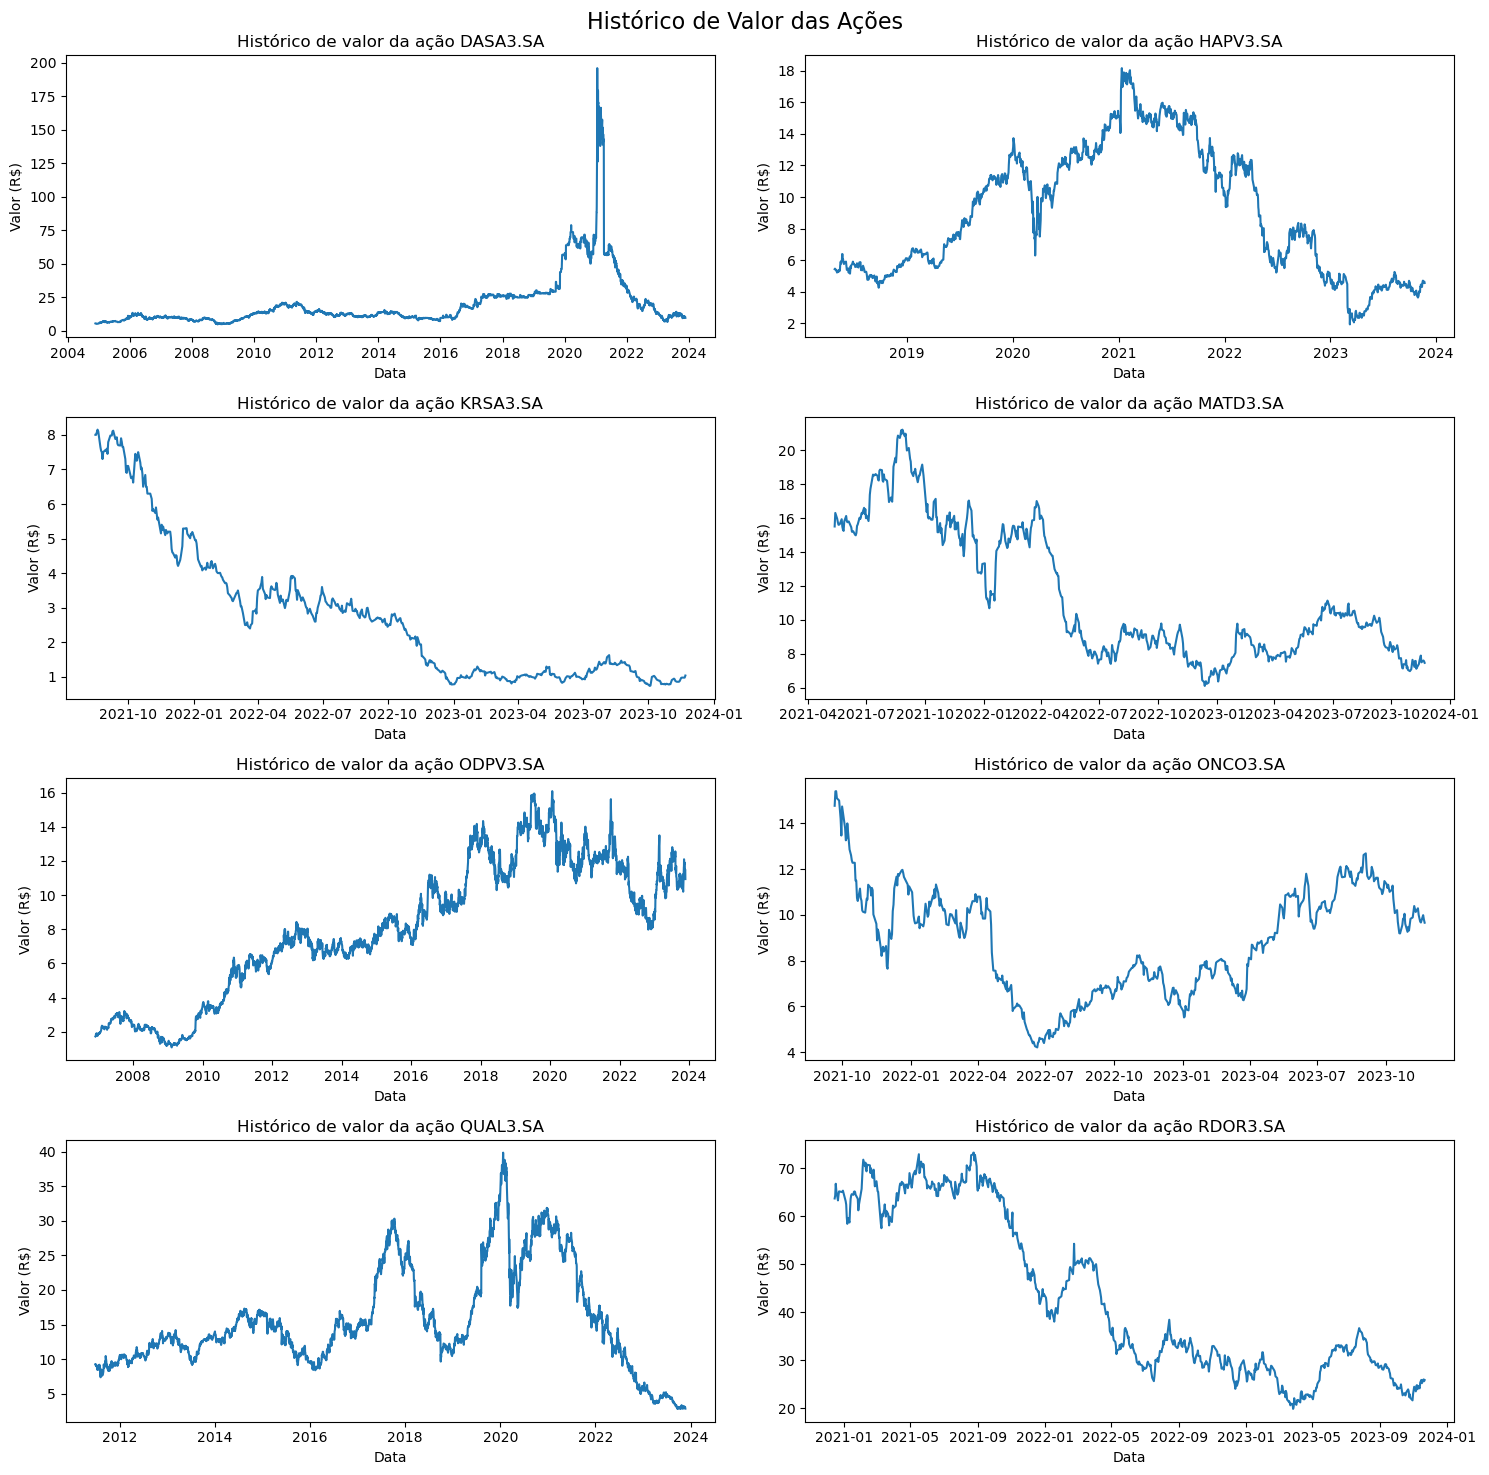

In [8]:
# Criando um grid de gráficos
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle("Histórico de Valor das Ações", fontsize=16)

# Laço de repetição que cria os gráficos
for (nome, dados), ax in zip(ticks_df['Close'].items(), axes.ravel()):
    sns.lineplot(x=dados.index, y=dados.values, ax=ax)
    ax.set_title(f'Histórico de valor da ação {nome}')
    ax.set_ylabel('Valor (R$)')
    ax.set_xlabel('Data')

# Ajuste e visualização
plt.tight_layout()
plt.show()

A fim de compraração vamos pegar um período em que haja dados de todas as empresas

In [9]:
# Criando a variável que conterá a data mais recente
data_mais_recente = datetime.date

# Reduzindo a dimensão do DataFrame (transformando o índice de operação em coluna)
unstacked_ticks_df = ticks_df.stack(level=0).rename_axis(['Date', 'Operation'])

# Excluindo todas as linhas com dados não numéricos (NaN) nós chegamos à primeira data comum a todos os ativos
data_mais_recente = unstacked_ticks_df.dropna().index[0][0]

# Verificando
print(f"A data mais recente dentre o primeiro registro dos DataFrames é: {data_mais_recente.date()}")

A data mais recente dentre o primeiro registro dos DataFrames é: 2021-09-21


Vamos selecionar somente o período entre 21 de Setembro de 2021 e a data de registro mais recente:

In [10]:
# Selecionando o período encontrado previamente
ticks_2021_df = ticks_df.loc[data_mais_recente:]

# Conferindo se todos os DataFrames tem o mesmo número de linhas
print({key: df.shape[0] for key, df in ticks_2021_df['Close'].items()})

{'DASA3.SA': 542, 'HAPV3.SA': 542, 'KRSA3.SA': 542, 'MATD3.SA': 542, 'ODPV3.SA': 542, 'ONCO3.SA': 542, 'QUAL3.SA': 542, 'RDOR3.SA': 542}


Restringindo os dados a somente os registros de fechamento ('Close'), que iremos efetivamente usar.

In [11]:
close_2021_df = pd.DataFrame(ticks_2021_df['Close'], columns= ticks_2021_df['Close'].columns)
close_2021_df

,DASA3.SA,HAPV3.SA,KRSA3.SA,MATD3.SA,ODPV3.SA,ONCO3.SA,QUAL3.SA,RDOR3.SA
Date,,,,,,,,
2021-09-21,44.96,15.1600,7.90,18.32,13.00,14.77,20.7316,67.67
2021-09-22,45.15,14.5707,7.80,18.51,13.34,15.40,20.3943,67.20
2021-09-23,44.74,14.8703,7.65,18.52,13.33,15.41,20.4232,67.89
2021-09-24,45.61,14.7205,7.65,18.71,14.32,15.10,20.2401,67.40
2021-09-27,44.73,14.4509,7.30,19.16,14.44,15.00,20.1533,66.15
...,...,...,...,...,...,...,...,...
2023-11-16,10.40,4.7100,0.97,7.90,11.78,9.71,3.1000,25.89
2023-11-17,10.15,4.5800,0.98,7.50,11.41,9.67,3.0700,25.21
2023-11-20,10.29,4.6400,0.98,7.61,11.50,9.99,3.0600,25.99


Agora podemos fazer análises comparativas entre os ativos

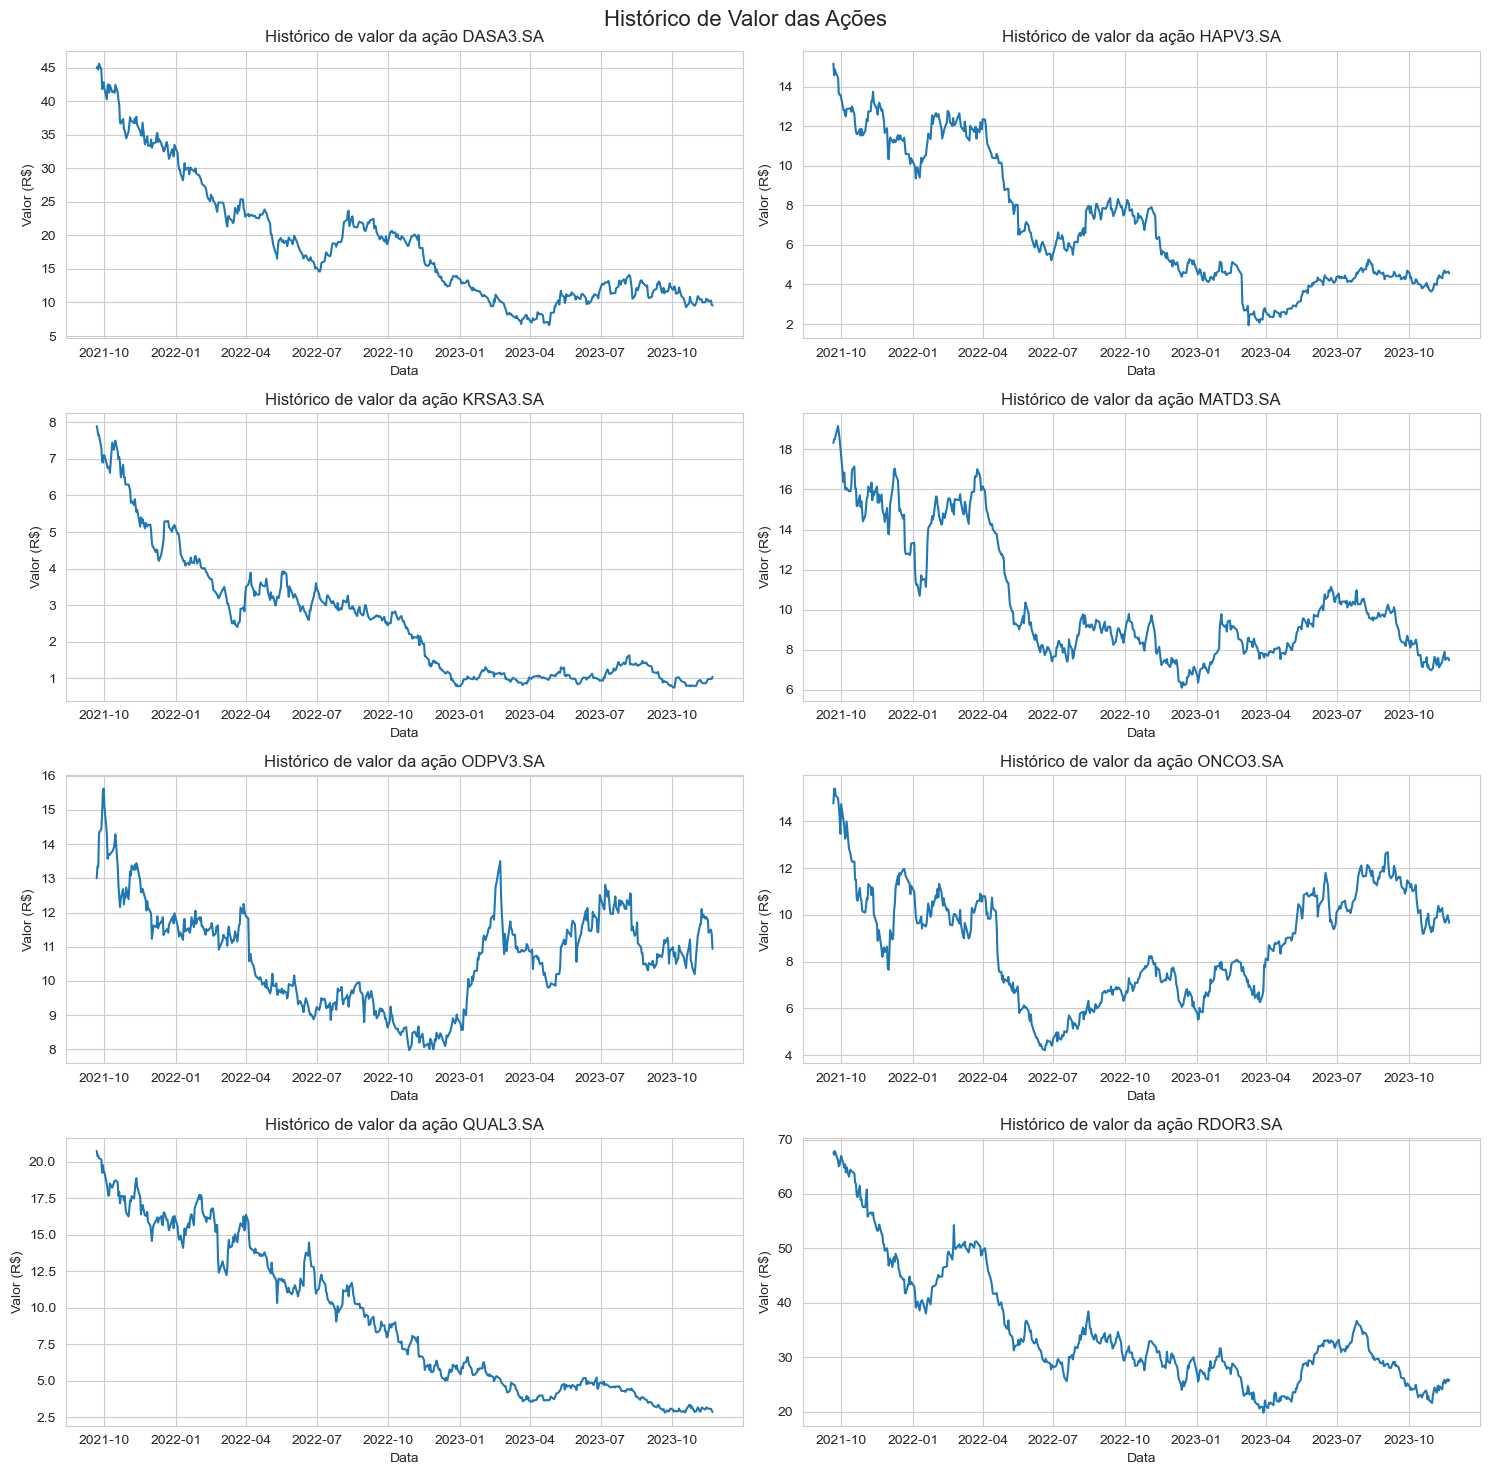

In [12]:
with sns.axes_style(style='whitegrid'):
  fig, axes = plt.subplots(4, 2, figsize=(15, 15))
  fig.suptitle("Histórico de Valor das Ações", fontsize=16)

  # Laço de repetição que cria os gráficos
  for (nome, dados), ax in zip(close_2021_df.items(), axes.ravel()):
      sns.lineplot(x=dados.index, y=dados.values, ax=ax)
      ax.set_title(f'Histórico de valor da ação {nome}')
      ax.set_ylabel('Valor (R$)')
      ax.set_xlabel('Data')

  plt.tight_layout()
  plt.show()

Vamos fazer uma correlação entre as ações e descobrir se há relação entre elas.

In [13]:
# Reseta o índice do DataFrame e calcula a correlação de Pearson entre os ativos
close_2021_df = close_2021_df.reset_index()
corr_df = close_2021_df.corr(method='pearson', numeric_only=True)
corr_df

,DASA3.SA,HAPV3.SA,KRSA3.SA,MATD3.SA,ODPV3.SA,ONCO3.SA,QUAL3.SA,RDOR3.SA
DASA3.SA,1.000000,0.933954,0.961222,0.822207,0.391488,0.302474,0.924022,0.912718
HAPV3.SA,0.933954,1.000000,0.880638,0.880372,0.362247,0.297807,0.936441,0.919407
KRSA3.SA,0.961222,0.880638,1.000000,0.772097,0.378040,0.224553,0.931447,0.873782
MATD3.SA,0.822207,0.880372,0.772097,1.000000,0.665366,0.582102,0.812146,0.935525
ODPV3.SA,0.391488,0.362247,0.378040,0.665366,1.000000,0.746374,0.312687,0.576234
ONCO3.SA,0.302474,0.297807,0.224553,0.582102,0.746374,1.000000,0.124267,0.464590
QUAL3.SA,0.924022,0.936441,0.931447,0.812146,0.312687,0.124267,1.000000,0.871306
RDOR3.SA,0.912718,0.919407,0.873782,0.935525,0.576234,0.464590,0.871306,1.000000


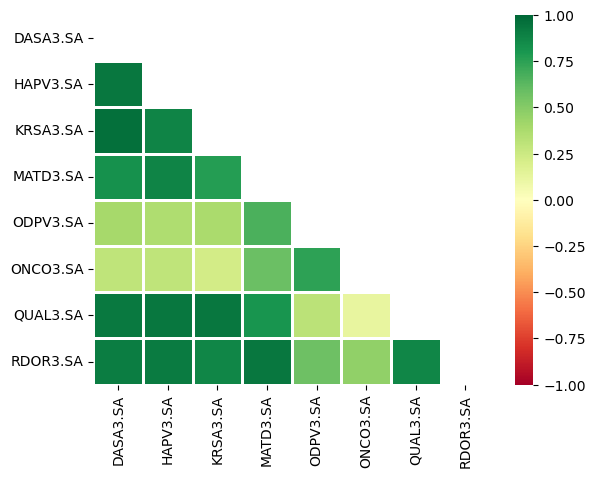

In [14]:
# Criando um numpy array identico (like) a corr_df e preenchido com zeros
mask = np.zeros_like(corr_df)

# Função do pacote NumPy que dado um array ou matriz (quadrada), seleciona a parte triângular superior.
mask[np.triu_indices_from(mask)] = True

# Gerando gráfico
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2, annot=True, fmt=".2f")
plt.xticks(rotation=90)
plt.show()

Vamos separar os tickers que temos em dois setores: Planos de Saúde e Hospitais:

In [15]:
# Criando um DataFrame com os ativos de planos de saúde e hospitais
ticks_plano_saude_df = close_2021_df[['Date', 'HAPV3.SA', 'ODPV3.SA', 'QUAL3.SA', 'DASA3.SA']]
ticks_hospitais_df = close_2021_df[['Date', 'KRSA3.SA', 'MATD3.SA', 'ONCO3.SA', 'RDOR3.SA']]

ticks_plano_saude_df.head(4)

,Date,HAPV3.SA,ODPV3.SA,QUAL3.SA,DASA3.SA
0,2021-09-21,15.1600,13.00,20.7316,44.96
1,2021-09-22,14.5707,13.34,20.3943,45.15
2,2021-09-23,14.8703,13.33,20.4232,44.74
3,2021-09-24,14.7205,14.32,20.2401,45.61


In [16]:
ticks_hospitais_df.head(4)

,Date,KRSA3.SA,MATD3.SA,ONCO3.SA,RDOR3.SA
0,2021-09-21,7.90,18.32,14.77,67.67
1,2021-09-22,7.80,18.51,15.40,67.20
2,2021-09-23,7.65,18.52,15.41,67.89
3,2021-09-24,7.65,18.71,15.10,67.40


In [17]:
# Criando DataFrames com dados de correlação
corr_planos_df = ticks_plano_saude_df.corr(method='pearson', numeric_only=True)
corr_hospitais_df = ticks_hospitais_df.corr(method='pearson', numeric_only=True)
corr_planos_df.head().reset_index().columns.name = None
corr_hospitais_df.head().reset_index().columns.name = None

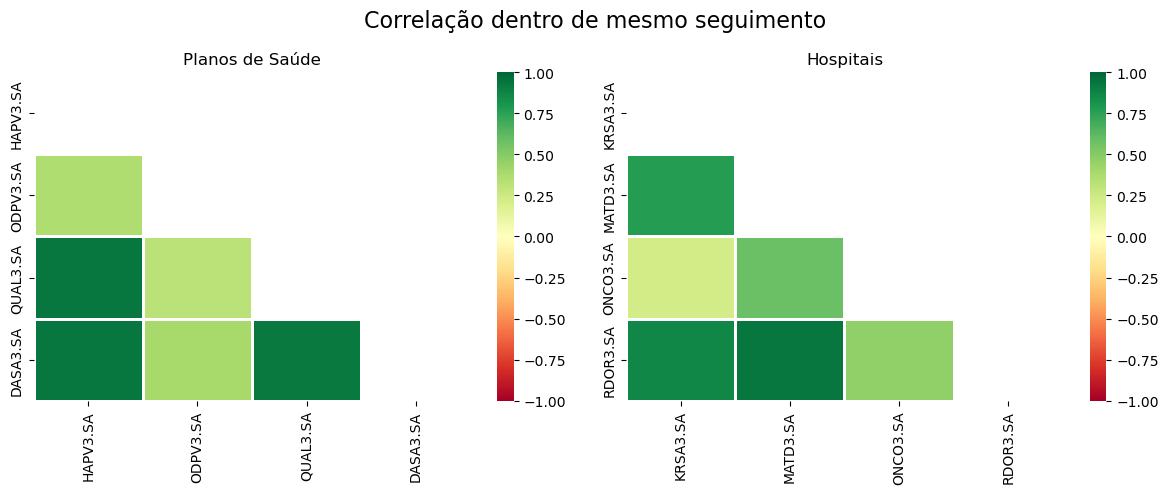

In [18]:
# Criando gráfico de correlação para os planos de saúde e hospitais
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Correlação dentro de mesmo seguimento", fontsize=16)

# Criando um numpy array identico (like) a corr_df e preenchido com zeros
mask_segmentos = np.zeros_like(corr_planos_df)
mask_segmentos[np.triu_indices_from(mask_segmentos)] = True

# Mapa de calor para corr_planos_df
sns.heatmap(corr_planos_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0, mask=mask_segmentos, linewidths=2, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Planos de Saúde")

# Mapa de calor para corr_hospitais_df
sns.heatmap(corr_hospitais_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0, mask=mask_segmentos, linewidths=2, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Hospitais")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.show()

Vamos verificar a correlação com um benchmark da B3 chamado Ibovespa

In [19]:
# Extrai o histórico de preços de fechamento (Close) do IBOVESPA
ibovespa_ticker = yf.Ticker('^BVSP')
ibov_df = ibovespa_ticker.history(start=data_mais_recente)
ibov_df = ibov_df[['Close']]
ibov_df = ibov_df.set_index(pd.to_datetime(ibov_df.index.date)).rename(columns={'Close':'Valores'})

In [20]:
# Criando um DataFrame para armazenar as correlações
ibov_corr = pd.DataFrame(columns=['Ticker', 'Correlacao'])

# Laço de repetição que calcula a correlação entre o IBOV e cada ativo
for t in close_2021_df.iloc[:,1:]:
  correlation = np.corrcoef(close_2021_df[t], ibov_df['Valores'])
  ibov_corr = pd.concat([ibov_corr, pd.DataFrame({'Ticker': [t], 'Correlacao': [np.round(correlation[0][1], 2)]})], ignore_index=True)

ibov_corr

,Ticker,Correlacao
0,DASA3.SA,-0.11
1,HAPV3.SA,0.00
2,KRSA3.SA,-0.23
3,MATD3.SA,0.13
4,ODPV3.SA,0.21
5,ONCO3.SA,0.51
6,QUAL3.SA,-0.24
7,RDOR3.SA,0.07


## Machine Learning

In [21]:
class DataPreparation:
    # Inicializa a classe com os parâmetros necessários
    def __init__(self, df, ticker_list, begin_date, end_date, features, target, operation, days_before):
        self.df = df.copy()
        self.transformed_df = df
        self.ticker_list = ticker_list
        self.begin_date = begin_date
        self.end_date = end_date
        self.features = features
        self.target = target
        self.operation = operation
        self.days_before = days_before

    # Transforma o dataframe para o formato longo
    def transform_to_long_format(self):
        self.transformed_df = self.transformed_df.stack(level=0).rename_axis(['Data', 'Operacao']).reset_index()

    # Seleciona as colunas necessárias e remove os valores NA
    def select_columns_and_drop_na(self):
        if self.ticker_list:
            self.transformed_df = self.transformed_df.loc[:, ['Data', 'Operacao', self.target] + self.ticker_list].dropna()
        else:
            self.transformed_df = self.transformed_df.dropna()

    # Transforma o dataframe para o formato largo
    def transform_to_wide_format(self):
        self.transformed_df = self.transformed_df.pivot(index='Data', columns='Operacao')
        self.transformed_df.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in self.transformed_df.columns]

    # Filtra o dataframe por data
    def filter_by_date(self):
        if self.begin_date:
            self.transformed_df = self.transformed_df[(self.transformed_df.index >= str(self.begin_date))]
        if self.end_date:
            self.transformed_df = self.transformed_df[(self.transformed_df.index<= str(self.end_date))]

    # Adiciona partes da data como colunas separadas
    def add_date_parts(self):
        self.transformed_df['Ano'] = self.transformed_df.index.year
        self.transformed_df['Mes'] = self.transformed_df.index.month
        self.transformed_df['Dia'] = self.transformed_df.index.day
        self.transformed_df['DiaDaSemana'] = self.transformed_df.index.dayofweek

    # Cria a variável alvo
    def create_target_variable(self):
        # Identifica a coluna alvo, cria 'y', remove a coluna alvo e desloca os dados
        target_column = [col for col in self.transformed_df.columns if col.startswith(self.target) and col.endswith(self.operation)]
        self.y = self.transformed_df[target_column][self.days_before:] if self.days_before != 0 else self.transformed_df[target_column]
        self.transformed_df = self.transformed_df.drop(columns=target_column)
        self.transformed_df = self.transformed_df.shift(-self.days_before).dropna()

    # Seleciona as colunas de recursos
    def select_feature_columns(self):
        # Se existem recursos, seleciona as colunas correspondentes
        if self.features:
            selected_columns = [col for col in self.transformed_df.columns if col.endswith(tuple(self.features))]
            self.transformed_df = self.transformed_df[['Ano', 'Mes', 'Dia', 'DiaDaSemana'] + selected_columns]

    # Cria a variável preditora
    def create_predictor_variable(self):
        # Define 'x' como uma cópia do dataframe
        self.x = self.transformed_df.copy()

    # Cria as variáveis x e y
    def create_xy(self):
        # Executa uma série de transformações e cria as variáveis 'x' e 'y'
        self.transform_to_long_format()
        self.select_columns_and_drop_na()
        self.transform_to_wide_format()
        self.filter_by_date()
        self.add_date_parts()
        self.create_target_variable()
        self.select_feature_columns()
        self.create_predictor_variable()

        # Retorna as variáveis 'x' e 'y'
        return self.x, self.y

class ModelTraining:
    # Inicializa a classe com o modelo, dados e tamanho do teste
    def __init__(self, model, x, y, test_size=0.2):
        self.model = model
        self.x = x
        self.y = y
        self.test_size = test_size
        self.y_scaler = StandardScaler()

    # Normaliza os dados
    def normalize_data(self):
        x_scaler = StandardScaler()
        self.x_normalized = pd.DataFrame(x_scaler.fit_transform(self.x), columns=self.x.columns, index=self.x.index)
        self.y_normalized = pd.DataFrame(self.y_scaler.fit_transform(self.y), columns=self.y.columns, index=self.y.index)

    # Divide os dados em treino e teste
    def split_data(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.x_normalized, self.y_normalized, test_size=self.test_size, shuffle=False)

    # Treina o modelo
    def fit_model(self):
        self.model.fit(self.x_train, self.y_train)

    # Faz a previsão
    def predict(self):
        self.predicted_normalized = self.model.predict(self.x_test)

    # Desnormaliza os dados
    def denormalize_data(self):
        self.predicted = pd.DataFrame(self.y_scaler.inverse_transform(self.predicted_normalized), columns=self.y.columns, index=self.x_test.index)
        self.y_test = pd.DataFrame(self.y_scaler.inverse_transform(self.y_test), columns=self.y.columns, index=self.y_test.index)

    # Executa todo o processo de treinamento e previsão
    def train_and_predict(self):
        self.normalize_data()
        self.split_data()
        self.fit_model()
        self.predict()
        self.denormalize_data()
        return self.y_test, self.predicted


In [22]:
# Define os parâmetros
df = ticks_df
ticker_list = ['DASA3.SA', 'HAPV3.SA', 'QUAL3.SA',  'KRSA3.SA', 'MATD3.SA']
features = ['Open', 'Volume','Close']
begin_date = ''
end_date = ''
target = 'RDOR3.SA'
operation = 'Close'
days_before = 7

# Cria uma instância da classe DataPreparation
data_prep = DataPreparation(df, ticker_list, begin_date, end_date, features, target, operation, days_before)

# Usa o método create_xy para preparar os dados
x, y = data_prep.create_xy()

In [23]:
# Define o modelo - treina - faz a previsão
model = LinearRegression()

model_training = ModelTraining(model, x, y)

y_test, predicted = model_training.train_and_predict()

In [24]:
# Cria DataFrame para comparar os valores reais e previstos
compare_df = pd.concat([y_test, predicted], axis=1).dropna()
compare_df = compare_df.set_axis(['Preço_Real', 'Preço_Previsto'], axis=1)

compare_df.head(5)

,Preço_Real,Preço_Previsto
Data,,
2023-06-14,33.08,33.090674
2023-06-15,33.08,33.182211
2023-06-16,32.97,32.602744
2023-06-19,33.18,32.458453
2023-06-20,32.69,32.192809


In [25]:
# Calcula as métricas
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
r2 = metrics.r2_score(y_test, predicted)
cv_scores = cross_val_score(model, x, y, cv=5)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Cria um dicionário de dados
data = {'Erro Médio Absoluto (MAE)': mae,
    'Erro Quadrático Médio (MSE)': mse,
    'Raiz do Erro Quadrático Médio (RMSE)': rmse,
    'R2 Score': r2,
    'Média do Score de Validação Cruzada': cv_mean,
    'Desvio Padrão da Validação Cruzada': cv_std}

# Cria um DataFrame a partir do dicionário
metrics_df = pd.DataFrame(data, index=[0]).T.reset_index()
metrics_df = metrics_df.set_axis(['Métrica', 'Score'], axis=1)

metrics_df

,Métrica,Score
0,Erro Médio Absoluto (MAE),0.545756
1,Erro Quadrático Médio (MSE),0.455243
2,Raiz do Erro Quadrático Médio (RMSE),0.674717
3,R2 Score,0.973337
4,Média do Score de Validação Cruzada,0.963836
5,Desvio Padrão da Validação Cruzada,0.031554


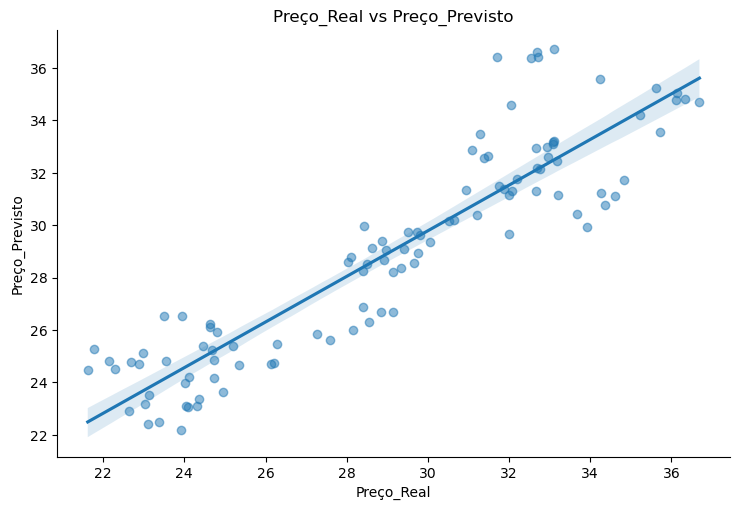

In [26]:
# Plota gráfico de dispersão
sns.lmplot(x='Preço_Real', y='Preço_Previsto', data=compare_df, aspect=1.5, fit_reg=True, scatter_kws={'alpha':0.5})

# Define os rótulos dos eixos e título
plt.xlabel("Preço_Real")
plt.ylabel("Preço_Previsto")
plt.title("Preço_Real vs Preço_Previsto")
plt.show()

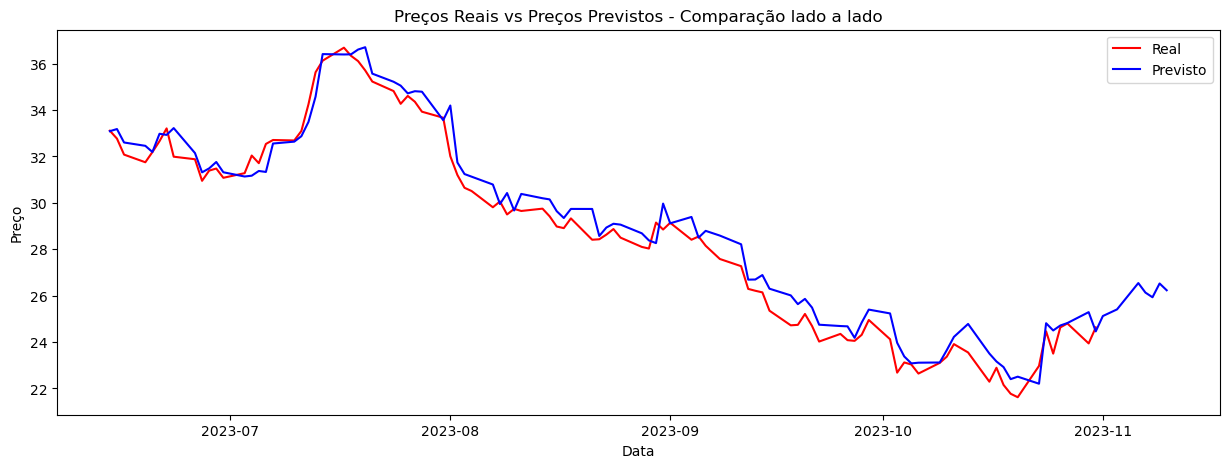

In [27]:
# Cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(15,5))

# Plota os valores reais e previstos
ax.plot_date(compare_df.index, compare_df.Preço_Real.shift(-days_before), 'r-', label='Real')
ax.plot_date(compare_df.index, compare_df.Preço_Previsto, 'b-', label='Previsto')

# Define os rótulos, título e legenda
ax.set_xlabel('Data')
ax.set_ylabel('Preço')
ax.set_title('Preços Reais vs Preços Previstos - Comparação lado a lado')
ax.legend()

plt.show()

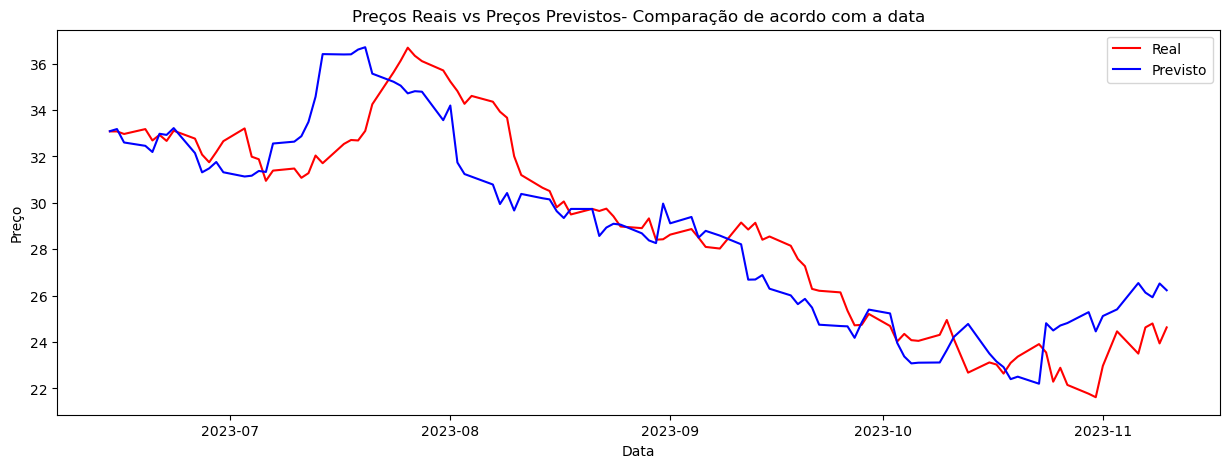

In [28]:
# Cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(15,5))

# Plota os dados reais
ax.plot_date(compare_df.index, compare_df.Preço_Real, 'r-', label='Real')

# Plota os dados previstos
ax.plot_date(compare_df.index, compare_df.Preço_Previsto, 'b-', label='Previsto')

# Define os rótulos, título e legenda
ax.set_xlabel('Data')
ax.set_ylabel('Preço')
ax.set_title('Preços Reais vs Preços Previstos- Comparação de acordo com a data')
ax.legend()

plt.show()